In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split, ShuffleSplit
from utils import plot_learning_curve, my_load_wine, print_tree, get_estimator_final_score, plot_loss_curve

# Support Vector Machines
## Breast Cancer Wisconsin (Diagnostic) Data Set

In [3]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

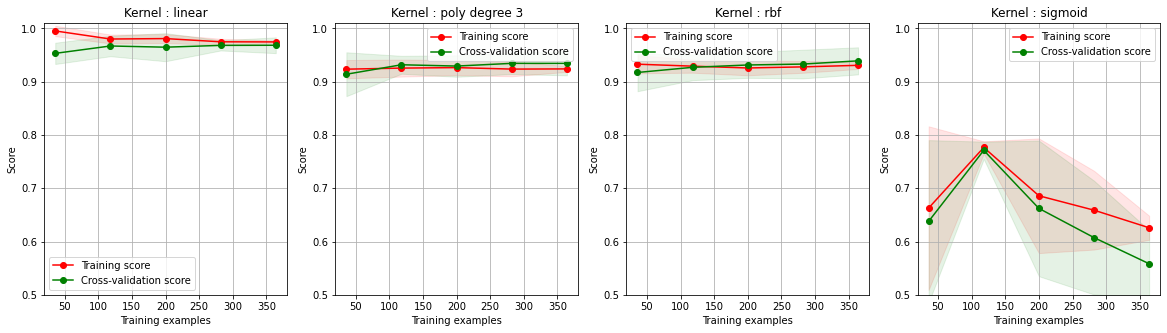

In [14]:
grid_size = 4
_, axes = plt.subplots(1, grid_size, figsize=(20, 5))
ylim = (0.5, 1.01)
kernel_types = ["linear", "poly", "rbf", "sigmoid"]
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, kernel in enumerate(kernel_types):
    axe_to_plot = axes[i]
    if kernel=="poly":
        title = f"Kernel : {kernel} degree 3"
    else:
        title = f"Kernel : {kernel}"
    estimator = svm.SVC(kernel=kernel)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="f1")

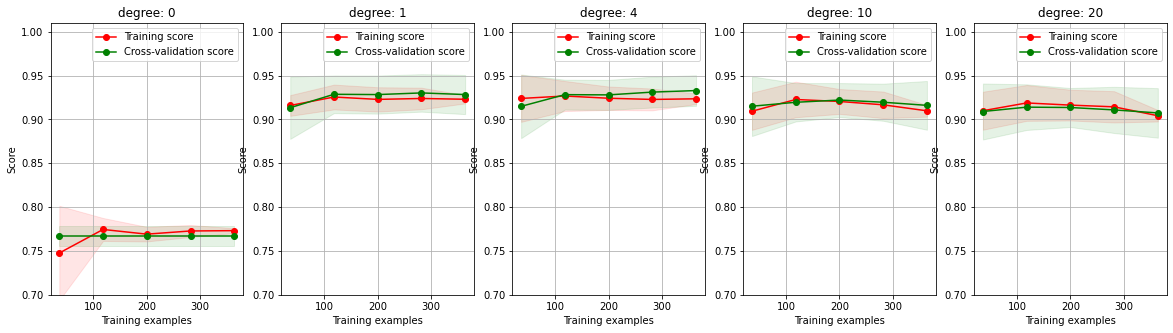

In [5]:
grid_size = 5
_, axes = plt.subplots(1, grid_size, figsize=(20, 5))
ylim = (0.7, 1.01)
degrees = [0, 1, 4, 10, 20]
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, degree in enumerate(degrees):
    axe_to_plot = axes[i]
    title = f"degree: {degree}"
    estimator = svm.SVC(kernel="poly", degree=degree)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="f1")

In [6]:
estimator = svm.SVC(kernel="linear")
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "Linear kernel", "f1")

Test f1 score for Linear kernel: 0.9655172413793103


0.9655172413793103

## Wine Quality Data Set

In [2]:
wine = my_load_wine("../Datasets/wine/")
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

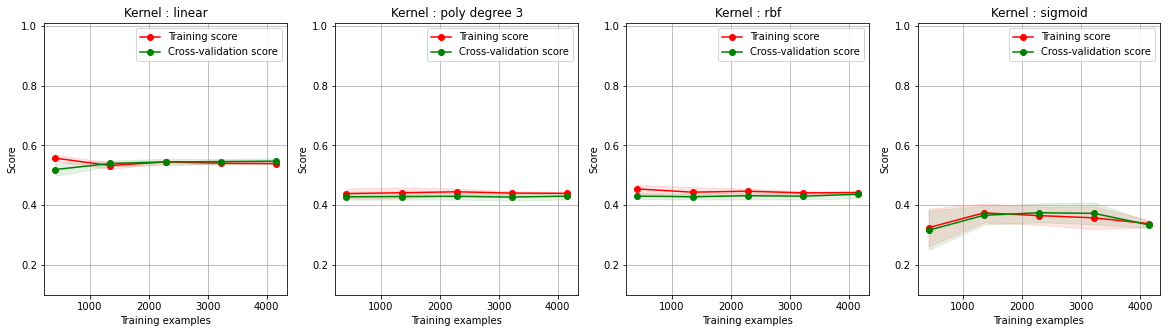

In [3]:
# Slow!
grid_size = 4
_, axes = plt.subplots(1, grid_size, figsize=(20, 5))
ylim = (0.1, 1.01)
kernel_types = ["linear", "poly", "rbf", "sigmoid"]
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, kernel in enumerate(kernel_types):
    axe_to_plot = axes[i]
    if kernel=="poly":
        title = f"Kernel : {kernel} degree 3"
    else:
        title = f"Kernel : {kernel}"
    estimator = svm.SVC(kernel=kernel)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="accuracy")

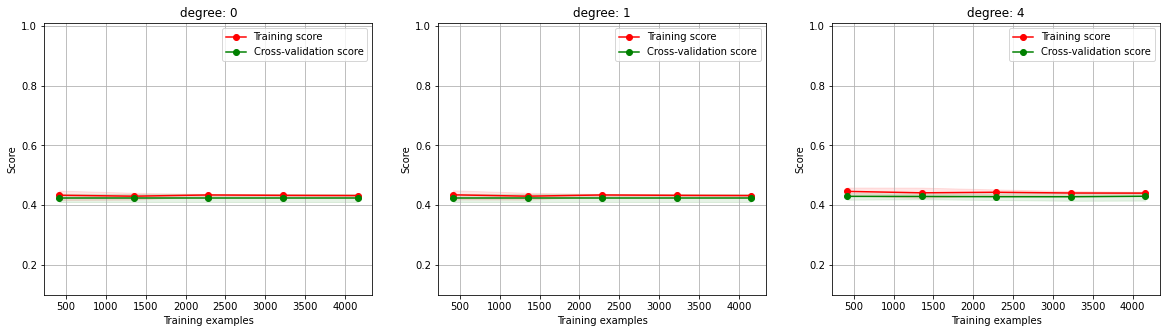

In [5]:
grid_size = 3
_, axes = plt.subplots(1, grid_size, figsize=(20, 5))
ylim = (0.1, 1.01)
degrees = [0, 1, 4]
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, degree in enumerate(degrees):
    axe_to_plot = axes[i]
    title = f"degree: {degree}"
    estimator = svm.SVC(kernel="poly", degree=degree)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="accuracy")

In [6]:
estimator = svm.SVC(kernel="linear")
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "Linear kernel", "accuracy")

Test accuracy score for Linear kernel: 0.5253846153846153


0.5253846153846153